In [ ]:
# Set up and installation

In [ ]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')

print("GPU:", tf.config.list_physical_devices('GPU'))
print("Num GPUs:", len(physical_devices))

GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs: 1


In [ ]:
# Checking the tensorflow version
print(tf.__version__)

2.15.0


In [ ]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Data Preprocessing
# Importing the dataset
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
# Loading the dataset
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [ ]:
x_train.shape
x_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape
y_test.shape

(10000,)

In [ ]:
# Checking the dimensions of the images
np.max(x_train)
np.min(x_train)
np.mean(x_train)

In [ ]:
class_names=['0 Top/T-shirt','1 Trouser','2 Pullover','3 Dress','4 Coat','5 Sandal','6 Shirt','7 Sneaker','8 Bag','9 Ankle boot']
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


In [ ]:
# Data Exploration
plt.figure()
plt.imshow(x_train[1])
plt.colorbar() # Shows the pixel values

In [ ]:
print(y_train[1])

0


In [ ]:
# Normalizing the dataset
x_train=x_train/255.0
x_test=x_test/255.0

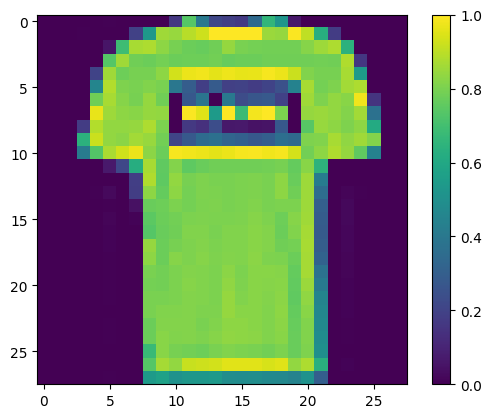

In [ ]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [ ]:
# Flattening the dataset - Converting the 2-D arrays to 1-D vector
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
x_train=x_train.reshape(-1,28*28)
x_test=x_test.reshape(-1,28*28)

In [ ]:
x_train.shape,x_test.shape

((60000, 784), (10000, 784))

In [ ]:
# Building the model
model=tf.keras.models.Sequential()
# Sequence of layers
# Adding 1st hidden layer - units (no. of neurons), activation function, input shape
model.add(tf.keras.layers.Dense(units=128,activation='relu',input_shape=(784,)))

In [ ]:
# Adding 2nd hidden layer with the dropout - to prevent overfitting by selecting random neurons
model.add(tf.keras.layers.Dropout(0.3))

In [ ]:
# Adding the output layer - units (no. of neurons) , activation function
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [ ]:
# Training the model
# 1. Compiling the model
# a. Optimizer - Minimize the loss function (Optimizer='Adam')
# b. Loss function - Acts as a giude to the optimizer (sparse_categorical_crossentropy)
# c. Metrics - To gauge the accuracy of the model (sparse_categorical_accuracy)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Training the model
model.fit(x_train,y_train,epochs=10) # epochs means the number of times we're training our model

Epoch 1/10
1875/1875 [==============================] - 8s 2ms/step - loss: 0.5554 - sparse_categorical_accuracy: 0.8034
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4184 - sparse_categorical_accuracy: 0.8489
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3874 - sparse_categorical_accuracy: 0.8601
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3665 - sparse_categorical_accuracy: 0.8652
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3564 - sparse_categorical_accuracy: 0.8699
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3402 - sparse_categorical_accuracy: 0.8759
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3324 - sparse_categorical_accuracy: 0.8777
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3229 - sparse_categorical_accuracy: 0.8805
Epoch 9/10
1875/1875 [==========

In [ ]:
# Model Evaluation
test_loss,test_accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3398 - sparse_categorical_accuracy: 0.8778


In [ ]:
print("Test Accuracy : {}".format(test_accuracy*100),"%")
print("Test Error : {}".format(test_loss*100),"%")

Test Accuracy : 87.77999877929688 %
Test Error : 33.97637903690338 %


In [ ]:
# Model Predictions
y_pred = model.predict(x_test).argmax(axis=1)
print(y_pred)

313/313 [==============================] - 1s 2ms/step
[9 2 1 ... 8 1 5]


In [ ]:
y_pred[110] # predicted value
y_test[110] # actual value

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)

In [ ]:
print(cm) # the diagonal elements represent the correctly predicted values

[[846   1  23  25   5   0  92   0   8   0]
 [  2 963   3  20   8   0   4   0   0   0]
 [ 16   0 834   6 100   0  44   0   0   0]
 [ 17  10  12 869  55   0  34   0   3   0]
 [  1   0 114  16 828   0  41   0   0   0]
 [  0   0   0   0   0 961   0  24   2  13]
 [137   0 135  24  86   0 613   0   5   0]
 [  0   0   0   0   0  13   0 972   0  15]
 [  4   0  11   3   7   1   9   4 961   0]
 [  0   0   0   1   0  12   1  55   0 931]]


In [ ]:
print(acc*100,"%")

87.78 %
